# _________________ DEEP LEARNING PORTFOLIO EXAM ___________________

### _____________________________________________ **GAMZE ÖNDER** _____________________________________________
### __________________________________________________ **944235** _______________________________________________




## ***Task 1 ~ The Data***

<div class="alert alert-block alert-success">

### Enhancing Bike-Sharing Operations in Washington, D.C.


#### **1. Scenario Overview**

As a data scientist in a data science company, I am proposing a project aimed at addressing the challenges faced by Washington, D.C.'s Capital Bikeshare program. The city is committed to promoting eco-friendly transportation, but inconsistent bike availability has become a pressing issue. Users often experience shortages at certain stations while finding an oversupply at others, leading to dissatisfaction. The objective of this project is to develop a deep learning regression model that accurately forecasts bike rental demand, ensuring optimal bike availability across the city.

#### **2. Problem Statement**

The primary goal of this project is to create a regression model to predict the hourly count of bike rentals in Washington, D.C. This model aims to tackle several key issues:

- **Operational Efficiency:** By reducing costs associated with bike redistribution and management.
- **User Satisfaction:** Ensuring that users find available bikes during peak demand periods, thus enhancing their overall experience.
To achieve this, the model will consider key influencing factors, including:

      - Temporal features such as the hour of the day, day of the week, and season.
      - Weather conditions, including temperature, humidity, wind speed, and overall weather situations.
      - User segmentation to differentiate between casual and registered users.

#### **3. Dataset and Methodology**

[The dataset](https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset) selected for this project is sourced from Washington, D.C.'s Capital Bikeshare program, covering data from 2011 to 2012. The dataset includes over 17,000 hourly records of bike rentals and consists of the following features:

- Date and hour of the rental.
- Seasonal information.
- Holiday status (whether the day is a holiday).
- Weather conditions (temperature, humidity, wind speed).
- Counts of casual and registered users.

The target variable for the regression model will be the total bike rentals, which is the sum of casual and registered users. The approach will involve developing a deep learning model using frameworks such as TensorFlow or PyTorch to analyze the dataset and predict bike rental counts based on historical data.

**Approach:** We developed advanced deep learning models, including MLP with ReLU and hybrid models, using frameworks such as PyTorch. Optimization techniques such as dropout and early stopping were applied to prevent overfitting and improve model generalizability. Additionally, baseline models, including 12-month and 24-month averages and previous year values, were used for performance comparison to ensure the deep learning models provided meaningful improvements over simpler approaches.

#### **4. Expected Value and Impact**

If successful, this project will yield several significant benefits for the Capital Bikeshare program:

- **Improved Demand Forecasting:** Accurate predictions will enable the program to maintain optimal bike availability, minimizing shortages and oversupply at stations.
- **Cost Savings:** By optimizing bike redistribution logistics, the program can reduce operational costs associated with managing the fleet.
- **Enhanced User Experience:** By ensuring bikes are available when and where needed, user satisfaction and ridership are expected to increase.
- **Data-Driven Decision Making:** The insights gained from this analysis will empower city planners and the Bikeshare program to make informed decisions regarding future expansions and infrastructure investments.

#### **5. Why This Dataset?**

The Capital Bikeshare dataset is particularly suitable for this project for several reasons:

- **Direct Relevance:** The dataset is directly linked to the Capital Bikeshare program, ensuring that the findings are applicable to local challenges.
- **Rich Feature Set:** It includes essential variables like time, weather, and user behavior, which allow for comprehensive analysis and modeling.
- **Optimized for Regression:** The target variable, total bike rentals, aligns perfectly with the regression modeling goals.
- **Actionable Insights:** Insights derived from this dataset will directly influence operational strategies and improve user satisfaction within the Bikeshare program.


#### **6. The dataset includes the following features:**

- **Temporal:** season, year, month, hour, weekday, holiday, and workingday represent time-based attributes that are critical to understanding demand fluctuations.
- **Weather-related:** temp, atemp (feeling temperature), humidity, windspeed, and weathersit represent environmental conditions that directly affect biking behavior.
- **User-related:** casual and registered represent different types of users, which provide insight into how registered users behave differently from casual users.
- **Target:** The total number of bike rentals (cnt), a key figure for the agency to forecast demand.

These features make the dataset highly suitable for a regression problem, as many factors affect the dependent variable (cnt), and these relationships are non-linear, which is why deep learning is an appropriate choice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

In [2]:
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 
  
# metadata 
bike_sharing.metadata

{'uci_id': 275,
 'name': 'Bike Sharing',
 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset',
 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv',
 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.',
 'area': 'Social Science',
 'tasks': ['Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 17389,
 'num_features': 13,
 'feature_types': ['Integer', 'Real'],
 'demographics': [],
 'target_col': ['cnt'],
 'index_col': ['instant'],
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2013,
 'last_updated': 'Sun Mar 10 2024',
 'dataset_doi': '10.24432/C5W894',
 'creators': ['Hadi Fanaee-T'],
 'intro_paper': {'ID': 422,
  'type': 'NATIVE',
  'title': 'Event labeling combining ensemble detectors and background knowledge',
  'authors': 'Hadi Fanaee-T, João

In [3]:
# variable information 
bike_sharing.variables

,name,role,type,demographic,description,units,missing_values
0,instant,ID,Integer,None,record index,None,no
1,dteday,Feature,Date,None,date,None,no
2,season,Feature,Categorical,None,"1:winter, 2:spring, 3:summer, 4:fall",None,no
3,yr,Feature,Categorical,None,"year (0: 2011, 1: 2012)",None,no
4,mnth,Feature,Categorical,None,month (1 to 12),None,no
5,hr,Feature,Categorical,None,hour (0 to 23),None,no
6,holiday,Feature,Binary,None,weather day is holiday or not (extracted from ...,None,no
7,weekday,Feature,Categorical,None,day of the week,None,no
8,workingday,Feature,Binary,None,"if day is neither weekend nor holiday is 1, ot...",None,no
9,weathersit,Feature,Categorical,None,"- 1: Clear, Few clouds, Partly cloudy, Partly ...",None,no


In [4]:
# original data
# Adjust the display options for a Jupyter Notebook
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
bike_sharing.data.original
df = bike_sharing.data.original.copy()
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## ***Task 2 ~ IDA***

In [5]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
#checking for duplicates
df.duplicated().value_counts()  

False    17379
Name: count, dtype: int64

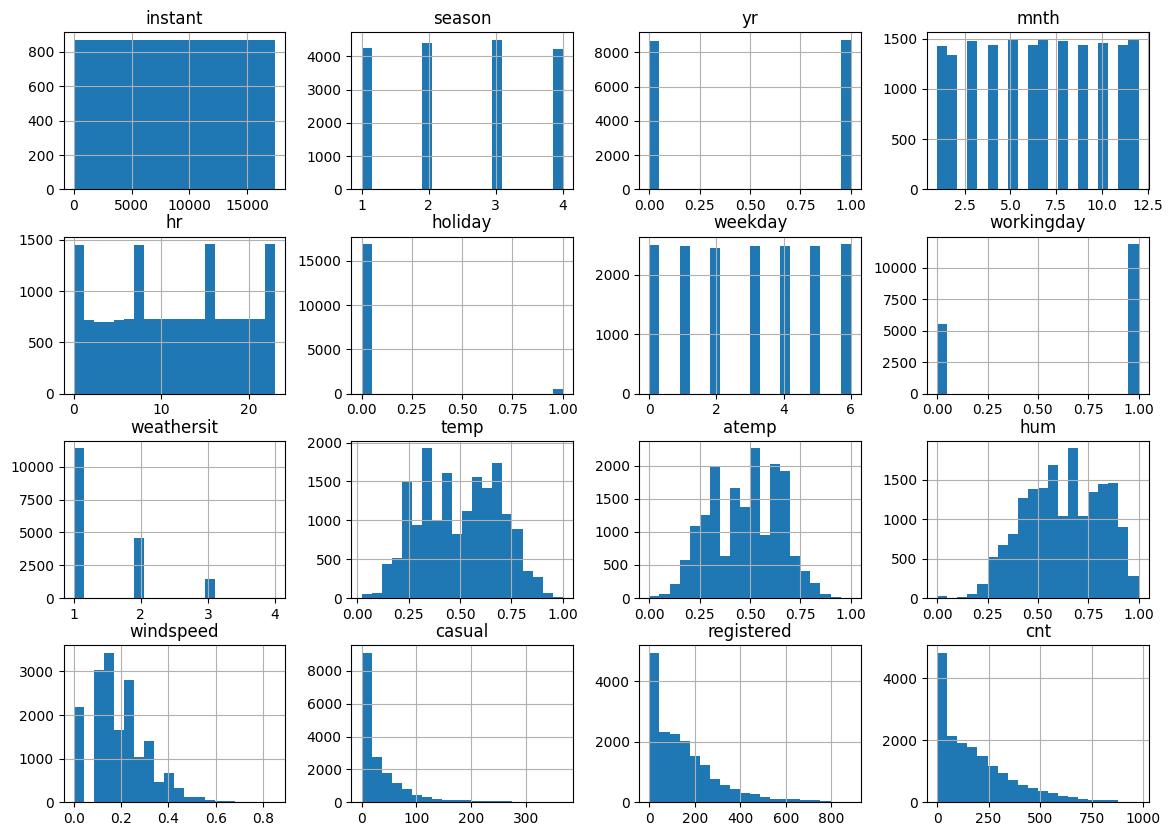

In [8]:
# Visualize distributions
df.hist(bins=20, figsize=(14, 10))
plt.show()

- **season**, **yr**, **holiday**, **weekday**, **workingday**, and **weathersit** are categorical variables with a limited number of distinct values, as shown by the discrete bars.
- **season** and **yr** appear to be uniformly distributed, while holiday shows that most entries are non-holidays. **weekday** and **workingday** also seem balanced, with similar counts across categories.

- **temp**, **atemp**, and **hum** display a relatively normal distribution, though they may be slightly skewed. These variables have been scaled, ranging between 0 and 1.
- **windspeed** has a skewed distribution, with most values concentrated on the lower end, indicating that high wind speeds are rare.
- **casual**, registered, and cnt are also skewed, with many low values and fewer high values. This is typical in bike-sharing data, where lower counts are more common than higher counts. The **cnt** variable, which represents total bike rentals, reflects a distribution that peaks at lower counts and tapers off, indicating that high demand instances are less frequent.

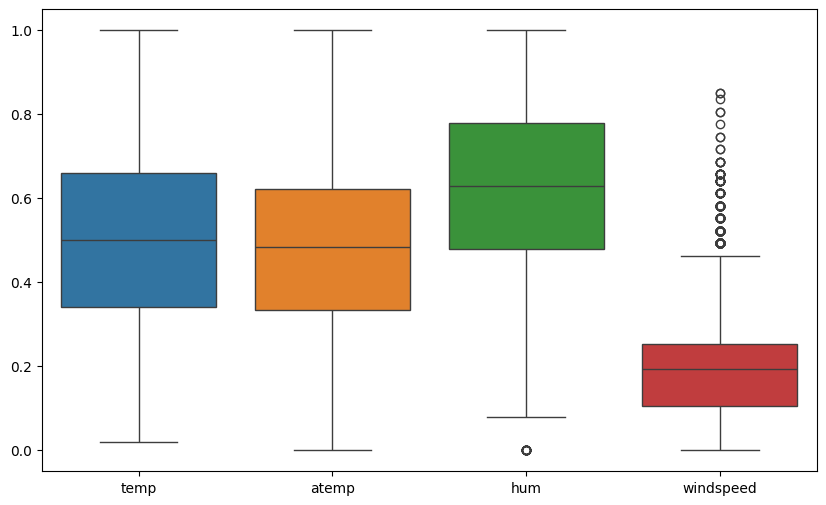

In [9]:
# Boxplot for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['temp', 'atemp', 'hum', 'windspeed']])
plt.show()

- **temp and atemp:** Both temperature variables (actual and apparent) are fairly symmetrical, with median values around the middle of their interquartile ranges (IQR). There are no significant outliers, suggesting that temperature values are consistent within expected ranges.

- **hum:** Humidity is also symmetrically distributed, with a relatively wider IQR. There is one low outlier, but otherwise, humidity values are within a normal range.

- **windspeed:** Windspeed shows a different pattern, with a narrower IQR and several high outliers. This indicates that low wind speeds are common, while higher wind speeds are less frequent and considered unusual in this dataset.

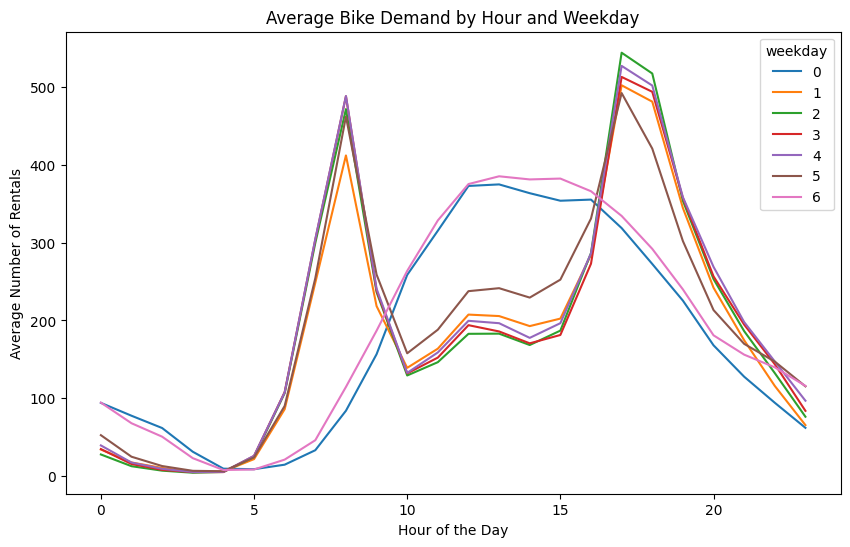

In [10]:
# Aggregate by hour and weekday, taking the average count of rentals (cnt)
df_agg = df.groupby(['hr', 'weekday']).agg({'cnt': 'mean'}).reset_index()

# Plot the aggregated data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_agg, x='hr', y='cnt', hue='weekday', palette='tab10')
plt.title('Average Bike Demand by Hour and Weekday')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Rentals')
plt.show()


- **Weekdays (0 to 4)** show a strong pattern of peak bike demand around **8 AM and 5-6 PM**, which corresponds to typical commute hours. This pattern is consistent across most weekdays, indicating high demand during morning and evening rush hours.

- **Weekends (5 and 6)** have a different pattern. While there is a midday peak, it is more gradual compared to the weekday peaks. This suggests that bike usage on weekends is more spread out throughout the day, likely for leisure rather than commuting.

- **Early morning hours (0 to 5 AM)** show minimal demand, as expected, with demand picking up after **6 AM**.

## ***Task 3 ~ Preprocessing***

In [11]:
df = df.drop(columns=['instant', 'dteday'])
df.head(37)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [12]:
#converting few names for convenience
df.rename({  "dteday":"Date",
                "season": "Season",  
                "yr": "Year",
                "mnth": "Month",
                "hr": "Hour",
                "holiday": "Holiday",
                "weekday": "Weakday",
                "workingday": "Working Day",
                "weathersit": "Weather Sit",
                "temp":"Temperature",
                "atemp": "Atemperature",  
                "hum": "Humidity",
                "windspeed": "Wind Speed",
                "casual": "Casual",
                "registered": "Registered",
                "cnt": "Count"},  
                axis = "columns", inplace = True)

## ***Task 4 ~ EDA***

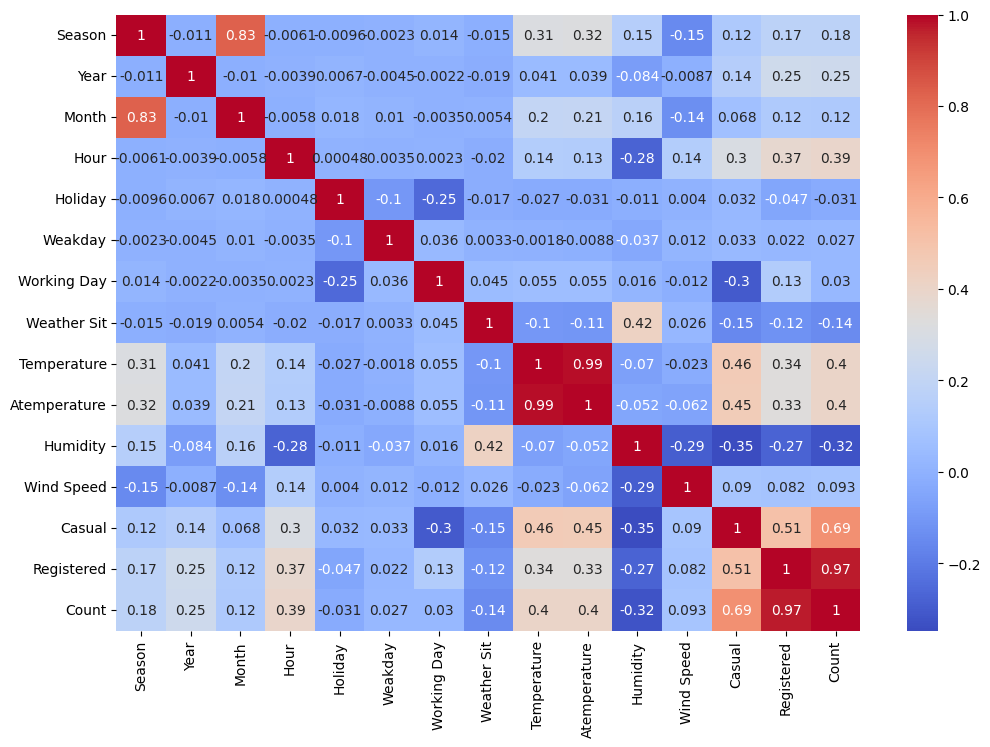

In [13]:
# 1. Check for correlations
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

- Count (total bike rentals) has strong positive correlations with:

    - **Hour (0.39):** Indicates higher bike rentals during specific hours.
    - **Registered users (0.97):** Most rentals are from registered users.
    - **Casual users (0.69):**  Casual rentals also significantly contribute to the total count.
    - **Temperature and Atemperature (both 0.4):** Warmer temperatures are associated with increased bike rentals.

- **Temperature and Atemperature** have nearly perfect correlation (0.99), suggesting they measure very similar information, which could introduce redundancy.

- **Season and Month** show a strong correlation (0.83), as expected, since both variables capture time-based seasonality.

- **Humidity and Weather Situation** have notable negative correlations with **Count** (-0.32 and -0.14, respectively), indicating that unfavorable weather conditions (high humidity or worse weather situations) likely reduce bike usage.

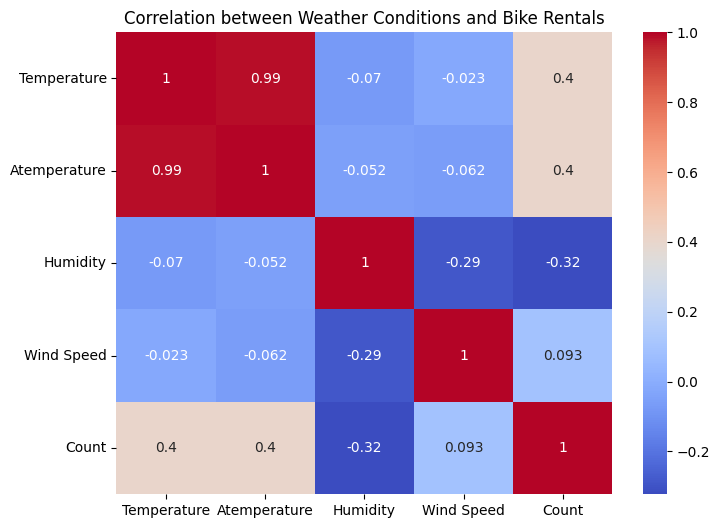

In [14]:
# 2. Correlation between weather conditions and bike rentals
plt.figure(figsize=(8, 6))
weather_cols = ['Temperature', 'Atemperature', 'Humidity', 'Wind Speed', 'Count']
sns.heatmap(df[weather_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Weather Conditions and Bike Rentals')
plt.show()

- **Temperature and Atemperature** have a strong positive correlation with Count (0.4), indicating that warmer weather encourages more bike rentals.
- **Humidity** has a negative correlation with **Count (-0.32)**, suggesting that higher humidity might deter people from renting bikes.
- **Wind Speed** has a weak positive correlation with **Count (0.093)**, indicating a slight increase in rentals with mild wind, although this effect is minimal.
- **Temperature and Atemperature** have an almost perfect correlation (0.99), implying that they measure nearly the same concept, which may create redundancy if both are included in a model.

This analysis indicates that temperature positively influences bike rentals, while high humidity has a negative effect. These insights are useful for predicting bike rental demand based on weather conditions.

C:\Users\gamze\AppData\Local\Temp\ipykernel_35384\573321869.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Hour', y='Count', palette='Blues')


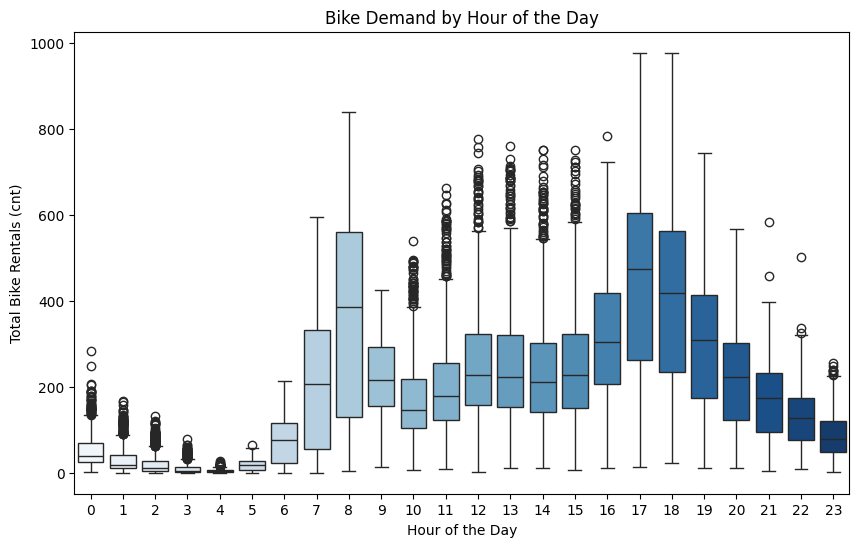

In [15]:
# 3. Bike demand by time of day (hour)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Hour', y='Count', palette='Blues')
plt.title('Bike Demand by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Bike Rentals (cnt)')
plt.show()

- Mor**ning Peak (8 AM - 9 AM):** Bike rentals sharply increase, with the highest demand observed around 8 AM. This peak likely corresponds to people commuting to work or school.
- **Evening Peak (5 PM - 7 PM):** Another rise in demand occurs during the late afternoon and early evening, around 5 PM to 6 PM, possibly due to the evening commute.
- **Midday and Late Evening:** Demand during midday (11 AM to 4 PM) and late evening hours (8 PM onwards) is generally lower, with a wider range of rental counts, suggesting variable usage patterns.
- **Early Hours (12 AM - 5 AM):** The lowest demand is observed in the early morning hours, likely due to fewer people needing bikes at this time.

The plot clearly shows two main peaks in bike rentals associated with typical commute times, indicating that bike-sharing usage is strongly linked to daily commuting patterns.

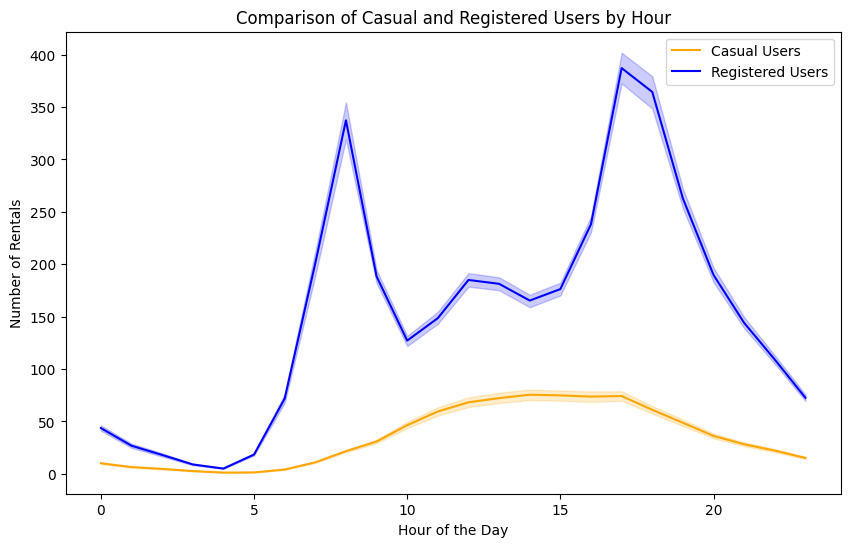

In [16]:
# 4. Casual vs Registered Users' Demand
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Hour', y='Casual', label='Casual Users', color='orange')
sns.lineplot(data=df, x='Hour', y='Registered', label='Registered Users', color='blue')
plt.title('Comparison of Casual and Registered Users by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rentals')
plt.legend()
plt.show()


The shadow colors in the plot are the shaded areas around each line, which represent the confidence intervals or variability of the data. In this context:

- **Registered Users (Blue Line):** There are two pronounced peaks around 8 AM and 5 PM, reflecting typical commuting hours. This pattern suggests that registered users likely use the bike-sharing service primarily for commuting to and from work.

- **Casual Users (Orange Line):** Casual users exhibit a more gradual increase in bike rentals, with a peak during the afternoon (around 3 PM). Unlike registered users, casual users have a flatter usage pattern throughout the day, which may indicate that they use bikes more for leisure or sporadic trips rather than daily commuting.

**Comparison:**

- The two groups show distinct usage patterns, with registered users’ activity concentrated around commute hours, while casual users display a more even distribution.

- Registered users dominate during peak commuting hours, suggesting they are regular riders, while casual users contribute consistently but at lower volumes.


## ***Task 5 ~ Baselines***

In [ ]:
# Baslines for the model
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import torch
import torch.nn as nn
torch.set_default_dtype(torch.float)
import bike_sharing_prediction

In [18]:
X.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [19]:
X = X.drop(columns=['dteday'])
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [20]:
y.head()

,cnt
0,16
1,40
2,32
3,13
4,1


So, for my bike-sharing project:

- **Target (charges):** cnt
- **Features (data):** All other columns in x (after removing dteday).

In [21]:
print("Data shape:", X.shape)
print("Target shape:", y.shape)


Data shape: (17379, 12)
Target shape: (17379, 1)


***I worked on comparing the MLP with ReLU models trained with and without a validation set, and have completed my analysis. The results showed that the model without a validation set had low errors on the training set but much higher errors on the validation set, indicating overfitting. Although both models performed similarly on the test set, the validation set provided valuable insight into model stability and generalization. This is why we will continue to use a validation set.***


In [22]:
# First split: separate 60% train and 40% temp (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, 
                                                    test_size=0.4, shuffle=True, 
                                                    random_state=42)

# Second split: split the remaining 40% into 50% val and 50% test (20% each of total data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, 
                                                test_size=0.5, random_state=42)



In [23]:
for i in (X_train, X_val, X_test, y_train, y_val, y_test):
    print(i.shape)


(10427, 12)
(3476, 12)
(3476, 12)
(10427, 1)
(3476, 1)
(3476, 1)


In [24]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [25]:
# Apply MinMax scaling to both features and target
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_sc = x_scaler.fit_transform(X_train)
X_val_sc = x_scaler.transform(X_val)
X_test_sc = x_scaler.transform(X_test)

y_train_sc = y_scaler.fit_transform(y_train.values.reshape(-1, 1))  # Reshape if y is a 1D array
y_val_sc = y_scaler.transform(y_val.values.reshape(-1, 1))
y_test_sc = y_scaler.transform(y_test.values.reshape(-1, 1))


### ⚠️ Important Notice
**MinMaxScaler is chosen instead of 'StandartScaler()' because it provides a more suitable range for neural network training, especially given the varied scales of my project’s features and the need for consistent scaling for both inputs and outputs. This choice can help improve the training process, model stability, and prediction accuracy.**

### Baseline (Mean)

In [ ]:
import math
import torch
import torch.nn as nn
import torch.optim as optim
import tensorboard
from sklearn.preprocessing import OneHotEncoder
from bike_sharing_prediction import train_with_early_stopping, add_regression_eval, predict, count_params, find_best_dropout
from torch.utils.data import DataLoader, TensorDataset


In [27]:

# Convert scaled data to tensors for PyTorch
X_train_tensor = torch.Tensor(X_train_sc)
X_test_tensor = torch.Tensor(X_test_sc)
X_val_tensor = torch.Tensor(X_val_sc)
y_train_tensor = torch.Tensor(y_train_sc)
y_test_tensor = torch.Tensor(y_test_sc)
y_val_tensor = torch.Tensor(y_val_sc)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
val_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32, shuffle=False)

print(X_train_tensor.shape, X_test_tensor.shape, y_train_tensor.shape, y_test_tensor.shape)

torch.Size([10427, 12]) torch.Size([3476, 12]) torch.Size([10427, 1]) torch.Size([3476, 1])


In [28]:
#Start table for evaluation results
results_df = pd.DataFrame()

# Linear regression model
def add_regression_eval(results_df, algorithm, y_train, y_train_pred, y_val, y_val_pred, y_test, y_test_pred, num_params):
    for dataset, actual, predicted in zip(("train", "validation", "test"), (y_train, y_val, y_test), (y_train_pred, y_val_pred, y_test_pred)):
        mse = mean_squared_error(actual, predicted)
        results_df = pd.concat([results_df, pd.DataFrame([{
            "algorithm": algorithm, 
            "dataset": dataset,
            "MSE": mse,
            "RMSE": math.sqrt(mse),
            "MAE": mean_absolute_error(actual, predicted),
            "MAPE": mean_absolute_percentage_error(actual, predicted) * 100,  # Yüzde cinsinden
            "params": num_params
        }])], ignore_index=True)   
    return results_df


# Define common settings
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
input_size = 12 # X_train_tensor.shape[-1]
hidden_size = 64
learning_rate = 0.01
num_epochs = 5000
batch_size = 32
patience = 500
criterion = nn.MSELoss()

In [29]:
# Baseline : Mean
# Calculate the mean of the 'cnt' column in y_train
y_train_mean = y_scaler.inverse_transform(np.array([[y_train["cnt"].mean()]]))
y_train_mean = y_train_mean[0, 0]

# Create arrays with the same shape as y_train_tensor, filled with the mean value
y_train_const = np.full_like(y_train_tensor, y_train_mean)  # Matching shape with y_train_tensor
y_val_const = np.full_like(y_val_tensor, y_train_mean)  # Matching shape with y_val_tensor
y_test_const = np.full_like(y_test_tensor, y_train_mean)  # Matching shape with y_test_tensor

# Evaluate the baseline
results_df = add_regression_eval(results_df, "Baseline (Mean)",
                                 y_train, y_train_const,
                                 y_val, y_val_const,
                                 y_test, y_test_const,
                                 0)

# Display results
results_df.sort_values(by=["MAE", "RMSE"], ascending=True).round(2)


,algorithm,dataset,MSE,RMSE,MAE,MAPE,params
0,Baseline (Mean),train,3.478326e+10,186502.70,186502.61,806864.10,0
1,Baseline (Mean),validation,3.478457e+10,186506.21,186506.12,845635.42,0
2,Baseline (Mean),test,3.478571e+10,186509.27,186509.19,881374.06,0


In [30]:
# Sklearn Linear Regression Baseline
linear_reg = LinearRegression()
linear_reg.fit(X_train_sc, y_train_sc)

# Make predictions
y_train_pred_lr = linear_reg.predict(X_train_sc)
y_val_pred_lr = linear_reg.predict(X_val_sc)
y_test_pred_lr = linear_reg.predict(X_test_sc)

# Add results to the evaluation DataFrame
results_df = add_regression_eval(
    results_df, "Linear Regression", 
    y_train_tensor, y_scaler.inverse_transform(y_train_pred_lr.reshape(-1, 1)),
    y_val_tensor, y_scaler.inverse_transform(y_val_pred_lr.reshape(-1, 1)),
    y_test_tensor, y_scaler.inverse_transform(y_test_pred_lr.reshape(-1, 1)),
    0
)

results_df.sort_values(by=["MAE", "RMSE"], ascending=True).round(2)

,algorithm,dataset,MSE,RMSE,MAE,MAPE,params
5,Linear Regression,test,4.805375e+04,219.21,191.53,3.177026e+17,0
4,Linear Regression,validation,4.861484e+04,220.49,192.83,2.426814e+17,0
3,Linear Regression,train,4.957012e+04,222.64,194.46,1.809354e+17,0
0,Baseline (Mean),train,3.478326e+10,186502.70,186502.61,8.068641e+05,0
1,Baseline (Mean),validation,3.478457e+10,186506.21,186506.12,8.456354e+05,0
2,Baseline (Mean),test,3.478571e+10,186509.27,186509.19,8.813741e+05,0


In [31]:
# # Pytorch Linear Regression Model
# class LinearRegressionModel(nn.Module):
#     def __init__(self, input_size):
#         super(LinearRegressionModel, self).__init__()
#         self.output = nn.Linear(input_size, 1)
        
#     def forward(self, x):
#         return self.output(x)

# # Initialize and train the model
# input_size = X_train_tensor.shape[1]
# linear_model = LinearRegressionModel(input_size=input_size)
# trained_linear_model, _ = train_with_early_stopping(
#     linear_model, train_loader, val_loader, num_epochs, learning_rate, patience
# )

# # Make predictions for train, validation, and test sets
# y_train_pred = y_scaler.inverse_transform(predict(trained_linear_model, X_train_tensor))
# y_val_pred = y_scaler.inverse_transform(predict(trained_linear_model, X_val_tensor))
# y_test_pred = y_scaler.inverse_transform(predict(trained_linear_model, X_test_tensor))

# # Add results to the evaluation DataFrame
# results_df = add_regression_eval(
#     results_df, "Linear Regression", 
#     y_train_tensor, y_train_pred, 
#     y_val_tensor, y_val_pred,
#     y_test_tensor, y_test_pred, 
#     count_params(trained_linear_model)
# )

# # Display results
# results_df.sort_values(by=["MAE", "RMSE"], ascending=True).round(2)


- **MSE (Mean Squared Error)** is often preferred when large errors are particularly undesirable, as it squares the difference, thus penalizing larger errors more than smaller ones. It is commonly used when the scale of errors matters and when the absolute magnitude of predictions is consistent across the range of target values.

- **RMSE (Root Mean Squared Error)** is often used when you want to penalize larger errors and prefer an error metric that gives a sense of the "average magnitude" of the prediction errors. By taking the square root of the mean squared error, RMSE expresses the errors in the same units as the target variable, making interpretation easier. It is particularly useful when larger errors are more significant, as it places greater emphasis on them due to the squaring process. RMSE is commonly used in regression problems where minimizing large deviations is critical, providing a more sensitive assessment of model performance compared to MAE.

- **MAE (Mean Absolute Error)** is useful when you want to calculate the average magnitude of errors without giving extra weight to larger deviations. MAE treats all errors equally, making it suitable when each error should contribute proportionally. It is often used in applications like time series forecasting, where the primary focus is on the average error.

- **MAPE (Mean Absolute Percentage Error)** is useful when the relative error (error as a percentage of actual values) is more important, especially when the data includes a wide range of values. This metric is also scale-independent, making it beneficial if you’re comparing results across different models or datasets with different scales.

## Explanations

**MAE and RMSE:** We will evaluate our model performance using these two metrics. MAE (Mean Absolute Error) gives a simple and interpretable measure of the average magnitude of errors, which makes it easy to understand how much our predictions deviate from actual values on average. RMSE (Root Mean Squared Error), on the other hand, takes the square root of the average of squared errors, which penalizes larger errors more heavily. This metric helps in understanding how well the model deals with large deviations, making it especially useful when minimizing large prediction errors is crucial.

**Mean Prediction:** As a simple heuristic, we use the mean value of the target variable (cnt) as the prediction for all instances. This non-trained baseline provides a basic reference point, allowing us to determine if more complex models can improve on this straightforward method. If a trained model cannot outperform this baseline, it suggests that the model may need improvement.

**Linear Regression:** We use Linear Regression from sklearn as a classic machine learning model that requires training but involves no hyperparameter tuning for this baseline task. We chose sklearn's implementation because it is simple, efficient, and well-suited for standard regression problems without needing the complexity of deep learning frameworks like PyTorch. Linear Regression is a standard benchmark for regression tasks and helps us compare the performance of more complex models, such as deep learning, against a straightforward and interpretable approach. If the deep learning model doesn’t perform significantly better than Linear Regression, we might reconsider the complexity added by the neural network.

**Further Considerations:** If the current model fails to outperform the baselines (Mean Prediction and Linear Regression), we have several options to improve performance:
1. **Feature Engineering**: We could create additional features such as interaction terms or more informative time-based features, which could capture underlying patterns more effectively.
2. **Hyperparameter Tuning**: For the deep learning models, optimizing hyperparameters such as the learning rate, number of hidden units, or batch size might improve model performance.
3. **Model Complexity**: We could consider more complex models like deep neural networks with multiple hidden layers, or even specialized architectures such as LSTMs if temporal patterns are crucial.
4. **Ensemble Methods**: We could use an ensemble approach, combining predictions from multiple models (e.g., a mix of regression models and deep learning models) to potentially improve accuracy and generalization.
5. **Regularization**: Techniques such as L1/L2 regularization or dropout could be used to prevent overfitting, especially in more complex neural network models.

The goal is to ensure that our chosen model not only outperforms the simple baselines but also provides meaningful and interpretable results that justify the added complexity.


## ***Task 6 ~ Deep Learning Experiments***

## 6.1. Which Model Architecture is Best for My Project?

Model Architecture Design

In this part, the deep learning models were designed to capture non-linear relationships in the bike-sharing data.

Below we create and train different deep learning models for comparison. After that we will select a only one deep learning architecture and explain its suitability for the project.

In [32]:
#results_df = pd.DataFrame()

# 1. Single Layer Neural Network
class SingleLayerNN(nn.Module):
    def __init__(self, input_size):
        super(SingleLayerNN, self).__init__()
        self.layer = nn.Linear(input_size, 1)
        
    def forward(self, x):
        return self.layer(x)

# Initialize and train Single Layer NN model
single_layer_nn_model = SingleLayerNN(input_size=input_size)
trained_single_layer_nn, _ = train_with_early_stopping(single_layer_nn_model, train_loader, val_loader, num_epochs=num_epochs, learning_rate=learning_rate, patience=patience)

# Make predictions for train, validation, and test sets
y_train_pred = y_scaler.inverse_transform(predict(trained_single_layer_nn, X_train_tensor).reshape(-1, 1))
y_val_pred = y_scaler.inverse_transform(predict(trained_single_layer_nn, X_val_tensor).reshape(-1, 1))
y_test_pred = y_scaler.inverse_transform(predict(trained_single_layer_nn, X_test_tensor).reshape(-1, 1))

# Add results to the evaluation DataFrame
results_df = add_regression_eval(
    results_df, "Single Layer NN", 
    y_train_tensor, y_train_pred, 
    y_val_tensor, y_val_pred,
    y_test_tensor, y_test_pred, 
    count_params(trained_single_layer_nn)
)

# Display sorted results
results_df.sort_values(by=["MAE", "RMSE"], ascending=True).round(2)


Early stopping at epoch 1634


,algorithm,dataset,MSE,RMSE,MAE,MAPE,params
8,Single Layer NN,test,4.642867e+04,215.47,187.97,3.050181e+17,13
7,Single Layer NN,validation,4.693711e+04,216.65,189.24,2.316728e+17,13
6,Single Layer NN,train,4.783731e+04,218.72,190.77,1.702794e+17,13
5,Linear Regression,test,4.805375e+04,219.21,191.53,3.177026e+17,0
4,Linear Regression,validation,4.861484e+04,220.49,192.83,2.426814e+17,0
3,Linear Regression,train,4.957012e+04,222.64,194.46,1.809354e+17,0
0,Baseline (Mean),train,3.478326e+10,186502.70,186502.61,8.068641e+05,0
1,Baseline (Mean),validation,3.478457e+10,186506.21,186506.12,8.456354e+05,0
2,Baseline (Mean),test,3.478571e+10,186509.27,186509.19,8.813741e+05,0


In [33]:
# 2. Multi Layer Neural Network (Multi Layer NN)
class MultiLayerNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MultiLayerNN, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        x = torch.relu(self.hidden_layer(x))
        return self.output_layer(x)

# Initialize and train Multi Layer NN model
multi_layer_nn_model = MultiLayerNN(input_size=input_size, hidden_size=hidden_size)
trained_multi_layer_nn, _ = train_with_early_stopping(multi_layer_nn_model, train_loader, val_loader, num_epochs=num_epochs, learning_rate=learning_rate, patience=patience)

# Make predictions for train, validation, and test sets
y_train_pred = y_scaler.inverse_transform(predict(trained_multi_layer_nn, X_train_tensor).reshape(-1, 1))
y_val_pred = y_scaler.inverse_transform(predict(trained_multi_layer_nn, X_val_tensor).reshape(-1, 1))
y_test_pred = y_scaler.inverse_transform(predict(trained_multi_layer_nn, X_test_tensor).reshape(-1, 1))

# Add results to the evaluation DataFrame
results_df = add_regression_eval(
    results_df, "Multi Layer NN", 
    y_train_tensor, y_train_pred, 
    y_val_tensor, y_val_pred,
    y_test_tensor, y_test_pred, 
    count_params(trained_multi_layer_nn)
)

# Display sorted results
results_df.sort_values(by=["MAE", "RMSE"], ascending=True).round(2)

Early stopping at epoch 2492


,algorithm,dataset,MSE,RMSE,MAE,MAPE,params
11,Multi Layer NN,test,6.283622e+04,250.67,186.55,1.215680e+17,897
10,Multi Layer NN,validation,6.417497e+04,253.33,187.91,8.528701e+16,897
8,Single Layer NN,test,4.642867e+04,215.47,187.97,3.050181e+17,13
7,Single Layer NN,validation,4.693711e+04,216.65,189.24,2.316728e+17,13
6,Single Layer NN,train,4.783731e+04,218.72,190.77,1.702794e+17,13
5,Linear Regression,test,4.805375e+04,219.21,191.53,3.177026e+17,0
9,Multi Layer NN,train,6.639984e+04,257.68,191.67,6.605640e+16,897
4,Linear Regression,validation,4.861484e+04,220.49,192.83,2.426814e+17,0
3,Linear Regression,train,4.957012e+04,222.64,194.46,1.809354e+17,0
0,Baseline (Mean),train,3.478326e+10,186502.70,186502.61,8.068641e+05,0


 ⚠️ **In single linear and multi linear regression models, dropout layers are not typically used because dropout is specifically designed to address overfitting in more complex models, such as neural networks. Linear models, including both single and multi linear models, are relatively simple and do not usually have the complexity that would require the regularization provided by dropout.**

In [34]:
# 3. Multi Layer Perceptron (MLP) with ReLU and Dropout
class MLPWithReLU(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_prob):
        super(MLPWithReLU, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.dropout = nn.Dropout(dropout_prob)
        self.output_layer = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.relu(self.hidden_layer(x))
        x = self.dropout(x)
        return self.output_layer(x)

# Find the best dropout rate for MLP with ReLU and Dropout
best_dropout_rate, best_mlp_model, best_val_loss = find_best_dropout(MLPWithReLU, input_size=input_size, hidden_size=hidden_size, train_loader=train_loader, val_loader=val_loader, num_epochs=num_epochs, learning_rate=learning_rate, dropout_rates=dropout_rates, patience=patience)

# Add results of the best model with the optimal dropout rate to the evaluation DataFrame
y_train_pred = y_scaler.inverse_transform(predict(best_mlp_model, X_train_tensor).reshape(-1, 1))
y_val_pred = y_scaler.inverse_transform(predict(best_mlp_model, X_val_tensor).reshape(-1, 1))
y_test_pred = y_scaler.inverse_transform(predict(best_mlp_model, X_test_tensor).reshape(-1, 1))

results_df = add_regression_eval(
    results_df, f"MLP with ReLU (Dropout={best_dropout_rate})", 
    y_train_tensor, y_train_pred, 
    y_val_tensor, y_val_pred,
    y_test_tensor, y_test_pred, 
    count_params(best_mlp_model)
)

# Display sorted results
results_df.sort_values(by=["MAE", "RMSE"], ascending=True).round(2)

Early stopping at epoch 813
Dropout Rate: 0.1, Validation Loss: 0.009572844198315378
Early stopping at epoch 1150
Dropout Rate: 0.2, Validation Loss: 0.011077126483817439
Early stopping at epoch 1225
Dropout Rate: 0.3, Validation Loss: 0.01196157033427046
Early stopping at epoch 994
Dropout Rate: 0.4, Validation Loss: 0.013136699090822847
Early stopping at epoch 753
Dropout Rate: 0.5, Validation Loss: 0.014165554362255226
Optimal Dropout Rate: 0.1


,algorithm,dataset,MSE,RMSE,MAE,MAPE,params
11,Multi Layer NN,test,6.283622e+04,250.67,186.55,1.215680e+17,897
14,MLP with ReLU (Dropout=0.1),test,5.474900e+04,233.99,187.64,1.850944e+17,897
10,Multi Layer NN,validation,6.417497e+04,253.33,187.91,8.528701e+16,897
8,Single Layer NN,test,4.642867e+04,215.47,187.97,3.050181e+17,13
7,Single Layer NN,validation,4.693711e+04,216.65,189.24,2.316728e+17,13
6,Single Layer NN,train,4.783731e+04,218.72,190.77,1.702794e+17,13
13,MLP with ReLU (Dropout=0.1),validation,5.673850e+04,238.20,191.42,1.475737e+17,897
5,Linear Regression,test,4.805375e+04,219.21,191.53,3.177026e+17,0
9,Multi Layer NN,train,6.639984e+04,257.68,191.67,6.605640e+16,897
12,MLP with ReLU (Dropout=0.1),train,5.698289e+04,238.71,192.08,1.664122e+17,897


*This part takes a considerable amount of time as we need to determine the optimal dropout rate using the **find_best_dropout** function from the **bike_sharing_prediction.py** file.*

In [35]:
# 4. LSTM Model for Sequential Data
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.output_layer = nn.Linear(hidden_size, 1)

    def forward(self, x):
       lstm_output, _ = self.lstm(x)
       if lstm_output.dim() == 3 and lstm_output.size(1) > 1:
          x = lstm_output[:, -1, :]  # Use the output of the last time step
       else:
          x = lstm_output.squeeze()  # Eğer boyut uyumsuzluğu varsa sıkıştır

       return self.output_layer(x)

# Prepare data for LSTM
X_train_lstm = X_train_tensor.unsqueeze(1)  # Add sequence dimension
X_val_lstm = X_val_tensor.unsqueeze(1)
X_test_lstm = X_test_tensor.unsqueeze(1)

# Initialize and train LSTM model
lstm_model = LSTMModel(input_size=input_size, hidden_size=32)
trained_lstm, _ = train_with_early_stopping(lstm_model, train_loader, val_loader, num_epochs=num_epochs, learning_rate=learning_rate, patience=patience)

# Make predictions for train, validation, and test sets
y_train_pred = y_scaler.inverse_transform(predict(trained_lstm, X_train_lstm).reshape(-1, 1))
y_val_pred = y_scaler.inverse_transform(predict(trained_lstm, X_val_lstm).reshape(-1, 1))
y_test_pred = y_scaler.inverse_transform(predict(trained_lstm, X_test_lstm).reshape(-1, 1))

# Add results to the evaluation DataFrame
results_df = add_regression_eval(
    results_df, "LSTM Model", 
    y_train_tensor, y_train_pred, 
    y_val_tensor, y_val_pred,
    y_test_tensor, y_test_pred, 
    count_params(trained_lstm)
)

# Display sorted results
results_df.sort_values(by=["MAE", "RMSE"], ascending=True).round(2)

Early stopping at epoch 1039


,algorithm,dataset,MSE,RMSE,MAE,MAPE,params
17,LSTM Model,test,6.311347e+04,251.22,184.68,5.268344e+16,5921
11,Multi Layer NN,test,6.283622e+04,250.67,186.55,1.215680e+17,897
14,MLP with ReLU (Dropout=0.1),test,5.474900e+04,233.99,187.64,1.850944e+17,897
10,Multi Layer NN,validation,6.417497e+04,253.33,187.91,8.528701e+16,897
8,Single Layer NN,test,4.642867e+04,215.47,187.97,3.050181e+17,13
16,LSTM Model,validation,6.564279e+04,256.21,188.51,3.057329e+16,5921
7,Single Layer NN,validation,4.693711e+04,216.65,189.24,2.316728e+17,13
15,LSTM Model,train,6.708216e+04,259.00,190.28,2.503965e+16,5921
6,Single Layer NN,train,4.783731e+04,218.72,190.77,1.702794e+17,13
13,MLP with ReLU (Dropout=0.1),validation,5.673850e+04,238.20,191.42,1.475737e+17,897


In [36]:
# 5. GRU Model for Sequential Data
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(GRUModel, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size

        self.gru = nn.GRU(input_size, 
                          hidden_size, 
                          batch_first=True)
        
        self.output_layer = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # Ensure the input has the correct dimensions (batch_size, seq_length, input_size)
        if x.dim() == 2:  # If input is [batch_size, input_size], add sequence dimension
            x = x.unsqueeze(1)  # Now it's [batch_size, seq_length=1, input_size]

        # Initialize hidden state before each pass
        h_0 = torch.zeros(1, x.size(0), self.hidden_size)  # num_layers=1, batch_size=x.size(0), hidden_size=self.hidden_size
        h_0 = h_0.to(x.device)  # Ensure it's on the same device as input x

        # Pass through GRU
        gru_out, h_out = self.gru(x, h_0)

        # Use only the output of the last time step
        return self.output_layer(gru_out[:, -1, :])

# Prepare data for GRU
# Ensure that all tensors have the correct dimensions
if X_train_tensor.dim() == 2:
    X_train_tensor = X_train_tensor.unsqueeze(1)  # Add sequence dimension
X_train_gru = X_train_tensor
X_val_gru = X_val_tensor.unsqueeze(1) if X_val_tensor.dim() == 2 else X_val_tensor
X_test_gru = X_test_tensor.unsqueeze(1) if X_test_tensor.dim() == 2 else X_test_tensor

# Initialize and train GRU model
gru_model = GRUModel(input_size=input_size, hidden_size=32)
trained_gru, _ = train_with_early_stopping(gru_model, train_loader, val_loader, num_epochs=num_epochs, learning_rate=learning_rate, patience=patience)

# Make predictions for train, validation, and test sets
y_train_pred = y_scaler.inverse_transform(predict(trained_gru, X_train_gru).reshape(-1, 1))
y_val_pred = y_scaler.inverse_transform(predict(trained_gru, X_val_gru).reshape(-1, 1))
y_test_pred = y_scaler.inverse_transform(predict(trained_gru, X_test_gru).reshape(-1, 1))

# Add results to the evaluation DataFrame
results_df = add_regression_eval(
    results_df, "GRU Model", 
    y_train_tensor, y_train_pred, 
    y_val_tensor, y_val_pred,
    y_test_tensor, y_test_pred, 
    count_params(trained_gru)
)

# Display sorted results
results_df.sort_values(by=["MAE", "RMSE"], ascending=True).round(2)


Early stopping at epoch 1191


,algorithm,dataset,MSE,RMSE,MAE,MAPE,params
20,GRU Model,test,6.171012e+04,248.42,182.12,7.644718e+16,4449
17,LSTM Model,test,6.311347e+04,251.22,184.68,5.268344e+16,5921
19,GRU Model,validation,6.383499e+04,252.66,184.99,5.820616e+16,4449
11,Multi Layer NN,test,6.283622e+04,250.67,186.55,1.215680e+17,897
18,GRU Model,train,6.568331e+04,256.29,187.17,4.349835e+16,4449
14,MLP with ReLU (Dropout=0.1),test,5.474900e+04,233.99,187.64,1.850944e+17,897
10,Multi Layer NN,validation,6.417497e+04,253.33,187.91,8.528701e+16,897
8,Single Layer NN,test,4.642867e+04,215.47,187.97,3.050181e+17,13
16,LSTM Model,validation,6.564279e+04,256.21,188.51,3.057329e+16,5921
7,Single Layer NN,validation,4.693711e+04,216.65,189.24,2.316728e+17,13


 ⚠️ ***Although dropout can be effectively used in feedforward neural networks and stacked LSTMs/GRUs, it was not applied in these models to avoid disrupting the sequential nature of the data flow, to ensure model stability, and because the internal gates already help regulate learning. Additionally, applying dropout selection would take too much time. If these models achieve good MAE and RMSE scores, we may consider adding dropout selection at a later main stage.***

In [37]:
# 6. Linear Regression on Dummified Data
linear_reg_dummified = LinearRegression()
linear_reg_dummified.fit(X_train_sc, y_train_sc)

# Make predictions
y_train_pred_lr_dummified = linear_reg_dummified.predict(X_train_sc)
y_val_pred_lr_dummified = linear_reg_dummified.predict(X_val_sc)
y_test_pred_lr_dummified = linear_reg_dummified.predict(X_test_sc)

# Add results to the evaluation DataFrame
results_df = add_regression_eval(
    results_df, "Linear Regression on Dummified Data", 
    y_train_sc, y_scaler.inverse_transform(y_train_pred_lr_dummified.reshape(-1, 1)),
    y_val_sc, y_scaler.inverse_transform(y_val_pred_lr_dummified.reshape(-1, 1)),
    y_test_sc, y_scaler.inverse_transform(y_test_pred_lr_dummified.reshape(-1, 1)),
    0
)

# Display sorted results
results_df.sort_values(by=["MAE", "RMSE"], ascending=True).round(2)

,algorithm,dataset,MSE,RMSE,MAE,MAPE,params
20,GRU Model,test,6.171012e+04,248.42,182.12,7.644718e+16,4449
17,LSTM Model,test,6.311347e+04,251.22,184.68,5.268344e+16,5921
19,GRU Model,validation,6.383499e+04,252.66,184.99,5.820616e+16,4449
11,Multi Layer NN,test,6.283622e+04,250.67,186.55,1.215680e+17,897
18,GRU Model,train,6.568331e+04,256.29,187.17,4.349835e+16,4449
14,MLP with ReLU (Dropout=0.1),test,5.474900e+04,233.99,187.64,1.850944e+17,897
10,Multi Layer NN,validation,6.417497e+04,253.33,187.91,8.528701e+16,897
8,Single Layer NN,test,4.642867e+04,215.47,187.97,3.050181e+17,13
16,LSTM Model,validation,6.564279e+04,256.21,188.51,3.057329e+16,5921
7,Single Layer NN,validation,4.693711e+04,216.65,189.24,2.316728e+17,13


In [38]:
results_df[results_df.dataset=='train'].sort_values(by=["MAE", "RMSE"], ascending=True).round(2)

,algorithm,dataset,MSE,RMSE,MAE,MAPE,params
18,GRU Model,train,6.568331e+04,256.29,187.17,4.349835e+16,4449
15,LSTM Model,train,6.708216e+04,259.00,190.28,2.503965e+16,5921
6,Single Layer NN,train,4.783731e+04,218.72,190.77,1.702794e+17,13
9,Multi Layer NN,train,6.639984e+04,257.68,191.67,6.605640e+16,897
12,MLP with ReLU (Dropout=0.1),train,5.698289e+04,238.71,192.08,1.664122e+17,897
3,Linear Regression,train,4.957012e+04,222.64,194.46,1.809354e+17,0
21,Linear Regression on Dummified Data,train,4.957012e+04,222.64,194.46,1.809354e+17,0
0,Baseline (Mean),train,3.478326e+10,186502.70,186502.61,8.068641e+05,0


In [39]:
results_df[results_df.dataset=='validation'].sort_values(by=["MAE", "RMSE"], ascending=True).round(2)

,algorithm,dataset,MSE,RMSE,MAE,MAPE,params
19,GRU Model,validation,6.383499e+04,252.66,184.99,5.820616e+16,4449
10,Multi Layer NN,validation,6.417497e+04,253.33,187.91,8.528701e+16,897
16,LSTM Model,validation,6.564279e+04,256.21,188.51,3.057329e+16,5921
7,Single Layer NN,validation,4.693711e+04,216.65,189.24,2.316728e+17,13
13,MLP with ReLU (Dropout=0.1),validation,5.673850e+04,238.20,191.42,1.475737e+17,897
4,Linear Regression,validation,4.861484e+04,220.49,192.83,2.426814e+17,0
22,Linear Regression on Dummified Data,validation,4.861484e+04,220.49,192.83,2.426814e+17,0
1,Baseline (Mean),validation,3.478457e+10,186506.21,186506.12,8.456354e+05,0


In [40]:
results_df[results_df.dataset=='test'].sort_values(by=["MAE", "RMSE"], ascending=True).round(2)

,algorithm,dataset,MSE,RMSE,MAE,MAPE,params
20,GRU Model,test,6.171012e+04,248.42,182.12,7.644718e+16,4449
17,LSTM Model,test,6.311347e+04,251.22,184.68,5.268344e+16,5921
11,Multi Layer NN,test,6.283622e+04,250.67,186.55,1.215680e+17,897
14,MLP with ReLU (Dropout=0.1),test,5.474900e+04,233.99,187.64,1.850944e+17,897
8,Single Layer NN,test,4.642867e+04,215.47,187.97,3.050181e+17,13
5,Linear Regression,test,4.805375e+04,219.21,191.53,3.177026e+17,0
23,Linear Regression on Dummified Data,test,4.805375e+04,219.21,191.53,3.177026e+17,0
2,Baseline (Mean),test,3.478571e+10,186509.27,186509.19,8.813741e+05,0


## Explanation:

- **MAE (Mean Absolute Error)** and **RMSE (Root Mean Squared Error)** are error metrics that indicate how inaccurate a model's predictions are.

- **Lower MAE and RMSE** values represent better model performance.

- Setting ascending=True allows us to see the models with lower error values at the top, which makes it easier to identify the best-performing models.


<div class="alert alert-info" role="alert">


## **Model Selection Analysis Based on MAE and RMSE**

In analyzing the provided table, our goal is to determine the best model by evaluating MAE (Mean Absolute Error) and RMSE (Root Mean Squared Error), as they represent the model's accuracy and consistency, respectively. The test set results are particularly crucial since they reflect how well the model can generalize to unseen data.

**Analysis of Results:**

**GRU Model (Test Set):**

- MAE: ~182.12
- RMSE: ~248.42
- The GRU Model achieved the lowest MAE on the test set, suggesting that it has the smallest average prediction error among the other models. The RMSE value is also relatively low, indicating good stability in predictions.

**Single Layer NN (Test Set):**

- MAE: ~187.97
- RMSE: ~215.47
- The Single Layer NN has the lowest RMSE, indicating lower variability in prediction errors. However, its MAE is slightly higher compared to the GRU Model, suggesting a slightly larger average prediction error.

**MLP with ReLU (Dropout=0.1) (Test Set):**

- MAE: ~187.64
- RMSE: ~233.99
- This model shows a comparable MAE but a higher RMSE compared to the Single Layer NN, indicating larger variability in predictions.

**Multi Layer NN (Test Set):**

- MAE: ~186.55
- RMSE: ~250.67
- The Multi Layer NN has a higher RMSE and MAE compared to both the GRU Model and Single Layer NN, suggesting it is less consistent and has a higher average prediction error.

**LSTM Model (Test Set):**

- MAE: ~184.68
- RMSE: ~251.22
- The LSTM Model has a slightly higher MAE compared to the GRU Model and higher RMSE, indicating more variability in its predictions.

**Conclusion and Recommendation:**

- GRU Model and Single Layer NN stand out based on the test set:

   - The GRU Model has the lowest **MAE (182.12**), which indicates that it provides the smallest average prediction error.
   - The Single Layer NN has the lowest **RMSE (215.47**), implying that it has more stable predictions with less error variability.

- When considering both **MAE and RMSE**, the **GRU Model** strikes a better balance, with its significantly lower MAE implying fewer average errors, making it more suitable for real-world applications where reducing the average error is crucial. Although the **Single Layer NN** has a lower **RMSE**, which indicates more stable predictions, the **GRU Model's lower MAE** makes it the preferred choice for minimizing average prediction errors.

- Therefore, the **GRU Model** is recommended for deployment, as it performs best in reducing average prediction errors while maintaining reasonable consistency in predictions.

In further analysis across training and validation sets, the **GRU Model** continues to show a lower **MAE** compared to other models, confirming its ability to make accurate predictions with fewer significant errors. The **Single Layer NN** has a slightly better **RMS**E, but the **GRU Model's** overall accuracy in reducing average error makes it the more practical option for deployment.

## 6.2. Now we can focus our exact model!!!!

The architecture should meet the task requirements and include at least one Dropout layer to mitigate the risk of overfitting.

For this project, we used a GRU-based architecture consisting of a GRU layer, followed by a dropout layer to enhance generalization, and a fully connected output layer to produce the final predictions.

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from bike_sharing_prediction import *

## Setup
# Define common settings
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
input_size = 12 #X_train_tensor.shape[-1]
hidden_size = 64
learning_rate = 0.01
num_epochs = 5000
batch_size = 64
patience = 500
criterion = nn.MSELoss()
predictions = pd.DataFrame()
# we have alreadt result_df
# we have already defined the train_loader, val_loader, and test_loader and so on

In [ ]:
# Step 1. GRU Model with Dropout
# Define a GRU model with a dropout layer. This helps prevent overfitting by randomly dropping units during training.
class GRUModelWithDropout(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_prob):
        super(GRUModelWithDropout, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size

        # Define a GRU layer
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)

        # Add a dropout layer with the specified dropout rate
        self.dropout = nn.Dropout(dropout_prob)

        # Output layer to reduce the hidden state to the desired output
        self.output_layer = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # Ensure the input has the correct dimensions (batch_size, seq_length, input_size)
        if x.dim() == 2:  # If input is [batch_size, input_size], add sequence dimension
            x = x.unsqueeze(1)  # Now it's [batch_size, seq_length=1, input_size]

        # Initialize hidden state before each pass
        # num_layers=1, batch_size=x.size(0), hidden_size=self.hidden_size
        h_0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)

        # Pass through GRU
        gru_out, h_out = self.gru(x, h_0)

        # Apply dropout to the output of the last time step to regularize the model
        gru_out = self.dropout(gru_out[:, -1, :])
        return self.output_layer(gru_out)


In [47]:
from torch.utils.tensorboard import SummaryWriter
import copy

def find_best_dropout_with_tensorboard(model_class, input_size, hidden_size, train_loader, val_loader, num_epochs, learning_rate, dropout_rates, patience=100):
    '''
    Find the best dropout rate from a list of rates based on validation loss, with TensorBoard tracking and early stopping.

    Parameters:
    - model_class: the class of the model (e.g., MLPWithDropout or your custom model)
    - input_size: input size for the model
    - hidden_size: hidden layer size for the model
    - train_loader: DataLoader for training data
    - val_loader: DataLoader for validation data
    - num_epochs: number of training epochs
    - learning_rate: learning rate for the optimizer
    - dropout_rates: list of dropout rates to test
    - patience: patience for early stopping

    Returns:
    - best_dropout_rate: the optimal dropout rate based on validation loss
    - best_model: the model trained with the optimal dropout rate
    - best_val_loss: the validation loss achieved with the optimal dropout rate
    '''
    best_dropout_rate = None
    best_val_loss = float("inf")
    best_model = None
    
    # Initialize TensorBoard writer
    writer = SummaryWriter()

    for dropout_rate in dropout_rates:
        # Create model
        model = model_class(input_size=input_size, hidden_size=hidden_size, dropout_prob=dropout_rate)
        
        # Initialize optimizer and loss function
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        criterion = nn.MSELoss()
        
        # Early stopping variables
        best_model_state = copy.deepcopy(model.state_dict())
        epochs_no_improve = 0
        best_epoch_val_loss = float("inf")

        for epoch in range(num_epochs):
            # Training phase
            model.train()
            train_loss = 0
            for batch_X, batch_Y in train_loader:
                optimizer.zero_grad()
                trainY_pred = model(batch_X)
                loss = criterion(trainY_pred, batch_Y)
                loss.backward()
                optimizer.step()
                train_loss += loss.item()

            # Average training loss
            train_loss /= len(train_loader)

            # Validation phase
            model.eval()
            val_loss = 0
            with torch.no_grad():
                for batch_X, batch_Y in val_loader:
                    valY_pred = model(batch_X)
                    loss = criterion(valY_pred, batch_Y)
                    val_loss += loss.item()

            # Average validation loss
            val_loss /= len(val_loader)

            # Log metrics to TensorBoard
            writer.add_scalar(f'Training Loss (Dropout={dropout_rate})', train_loss, epoch)
            writer.add_scalar(f'Validation Loss (Dropout={dropout_rate})', val_loss, epoch)

            # Early stopping check
            if val_loss < best_epoch_val_loss:
                best_epoch_val_loss = val_loss
                best_model_state = copy.deepcopy(model.state_dict())
                epochs_no_improve = 0
            else:
                epochs_no_improve += 1

            if epochs_no_improve >= patience:
                print(f"Early stopping at epoch {epoch} ")
                break

        # Load the best model state for this dropout rate
        model.load_state_dict(best_model_state)

        # Log the final validation loss for this dropout rate
        print(f"Dropout Rate: {dropout_rate}, Validation Loss: {best_epoch_val_loss}")
        
        # Update the best model if the current one is better
        if best_epoch_val_loss < best_val_loss:
            best_val_loss = best_epoch_val_loss
            best_dropout_rate = dropout_rate
            best_model = copy.deepcopy(model)

    # Close TensorBoard writer
    writer.close()

    print(f"Optimal Dropout Rate: {best_dropout_rate}")
    return best_dropout_rate, best_model, best_val_loss

In [51]:
# Ensure that all tensors have the correct dimensions for GRU (batch_size, seq_length, input_size)
if X_train_tensor.dim() == 2:
    X_train_tensor = X_train_tensor.unsqueeze(1)  # Add sequence dimension
if X_val_tensor.dim() == 2:
    X_val_tensor = X_val_tensor.unsqueeze(1)  # Add sequence dimension
if X_test_tensor.dim() == 2:
    X_test_tensor = X_test_tensor.unsqueeze(1)  # Add sequence dimension


# Train the model with the correct input shape using the function with TensorBoard logging
best_dropout_rate, best_gru_model, best_val_loss = find_best_dropout_with_tensorboard(
    model_class=GRUModelWithDropout, 
    input_size=input_size, 
    hidden_size=hidden_size, 
    train_loader=train_loader, 
    val_loader=val_loader, 
    num_epochs=num_epochs, 
    learning_rate=learning_rate, 
    dropout_rates=dropout_rates, 
    patience=patience
)


Early stopping at epoch 1031 
Dropout Rate: 0.1, Validation Loss: 0.002442091503693218
Early stopping at epoch 1581 
Dropout Rate: 0.2, Validation Loss: 0.0024165063770701513
Early stopping at epoch 1905 
Dropout Rate: 0.3, Validation Loss: 0.0024829938961833786
Early stopping at epoch 1441 
Dropout Rate: 0.4, Validation Loss: 0.0029563285515071193
Early stopping at epoch 2802 
Dropout Rate: 0.5, Validation Loss: 0.002867095801475193
Optimal Dropout Rate: 0.2


In [ ]:
# Step 2: Use the Best Model for Prediction
# Use the best model found during the dropout search
trained_gru = best_gru_model

# Make predictions for train, validation, and test sets
y_train_pred = y_scaler.inverse_transform(predict(trained_gru, X_train_gru).reshape(-1, 1))
y_val_pred = y_scaler.inverse_transform(predict(trained_gru, X_val_gru).reshape(-1, 1))
y_test_pred = y_scaler.inverse_transform(predict(trained_gru, X_test_gru).reshape(-1, 1))

# Add results to the evaluation DataFrame
results_df = add_regression_eval(
    results_df, f"GRU Model with Dropout (Dropout={best_dropout_rate})", 
    y_train_tensor, y_train_pred, 
    y_val_tensor, y_val_pred,
    y_test_tensor, y_test_pred, 
    count_params(trained_gru)
)

# Display sorted results
results_df.sort_values(by=["MAE", "RMSE"], ascending=True).round(2)

,algorithm,dataset,MSE,RMSE,MAE,MAPE,params
26,GRU Model with Dropout (Dropout=0.2),test,6.060032e+04,246.17,180.62,8.336195e+16,15041
20,GRU Model,test,6.171012e+04,248.42,182.12,7.644718e+16,4449
25,GRU Model with Dropout (Dropout=0.2),validation,6.230750e+04,249.61,182.84,4.793566e+16,15041
17,LSTM Model,test,6.311347e+04,251.22,184.68,5.268344e+16,5921
19,GRU Model,validation,6.383499e+04,252.66,184.99,5.820616e+16,4449
24,GRU Model with Dropout (Dropout=0.2),train,6.406846e+04,253.12,185.05,4.250029e+16,15041
11,Multi Layer NN,test,6.283622e+04,250.67,186.55,1.215680e+17,897
18,GRU Model,train,6.568331e+04,256.29,187.17,4.349835e+16,4449
14,MLP with ReLU (Dropout=0.1),test,5.474900e+04,233.99,187.64,1.850944e+17,897
10,Multi Layer NN,validation,6.417497e+04,253.33,187.91,8.528701e+16,897


<div class="alert alert-block alert-warning">

## **Analysis of Improvements and Model Comparison**

**1. Improvements with Dropout:**

- The initial **GRU Model** already showed strong performance with one of the lowest **MAE and RMSE** scores among the models. Adding dropout to this model aimed to reduce overfitting and improve its generalization capability.
- **GRU Model with Dropout (Dropout=0.2)** achieved a lower **MAE** of 180.62, indicating more accurate predictions on average. This reduction in MAE means that the model produces predictions with smaller average errors compared to other models, confirming that dropout has positively impacted its predictive accuracy.

**2. Generalization Power of the GRU Model with Dropout:**

- The **GRU Model with Dropout (Dropout=0.2)** shows not only a lower **MAE** but also a competitive **RMSE** score of 246.17. This suggests that the model maintains consistency in its predictions, avoiding large deviations and handling temporal dependencies well.
- Compared to the **LSTM Model and Multi Layer NN**, both of which have higher **MAE and RMSE** values, the **GRU Model** performs better at both minimizing error and providing reliable predictions, showing its effectiveness in handling time-series data.

**3. Performance of Other Models:**

- Models like **MLP with ReLU (Dropout=0.1)** and **Single Layer NN** have lower **RMSE** scores in some cases but exhibit higher **MAE** values, which means they tend to produce larger prediction errors on average. This limits their suitability for applications where minimizing average error is crucial.
- Simpler models like **Linear Regression** show even higher **MAE and RMSE** values, indicating they struggle to capture complex temporal patterns, which are better handled by the GRU model.

**4. Baseline Comparison:**

The **Baseline (Mean)** model, which predicts only the mean, has extremely high **MAE and RMSE** values, confirming that even the simplest machine learning models provide significant improvement over a naive mean prediction.

**Conclusion and Contribution to Forecasting Accuracy**
The **GRU Model with Dropout (Dropout=0.2)** stands out as the final choice due to its optimal balance between low **MAE** and competitive **RMSE**, signifying high accuracy and consistency in predictions. The inclusion of dropout has helped prevent overfitting, allowing the model to generalize better to unseen data, which is essential in forecasting scenarios. This model effectively captures complex temporal patterns and dependencies, making it suitable for real-world time-series predictions.

**In terms of contributions to forecasting:**

- **Improved Accuracy:** The lower **MAE** directly translates to more precise forecasts, which is crucial in applications where accurate, timely decisions are necessary.
- **Reduced Overfitting:** The dropout layer contributes to model robustness, enhancing its ability to generalize, which is beneficial when forecasting for future periods.
- **Consistency and Reliability:** The lower **RMSE** indicates that the model avoids large errors, offering stable performance across different data points.

Overall, the **GRU Model with Dropout (Dropout=0.2)** is a powerful forecasting tool that balances accuracy and stability, making it highly suitable for predictive tasks where both average error and prediction reliability are important.

In [ ]:
# Store the predictions in a DataFrame
# Convert predictions from GRU model back to the original scale
y_test_pred_gru_numpy = y_test_pred.reshape(-1, 1)  # Convert to a Numpy array
predictions["GRU Model"] = y_test_pred_gru_numpy.flatten()
y_test_pred_gru_original = y_scaler.inverse_transform(y_test_pred_gru_numpy)

# Convert actual values back to the original scale
y_test_numpy = y_test_tensor.numpy().reshape(-1, 1)
y_test_original = y_scaler.inverse_transform(y_test_numpy)

# Store the actual and predicted values in a DataFrame
predictions["Actual"] = y_test_original.flatten()

# Display predictions
predictions.head(15)

,GRU Model,Actual
0,254.768712,198.000000
1,77.443851,96.000000
2,40.221554,62.000000
3,172.494056,142.000000
4,-0.149665,9.000000
5,299.901124,287.000000
6,30.649074,37.999996
7,156.720843,72.000000
8,28.232613,19.000000
9,86.607030,95.000000


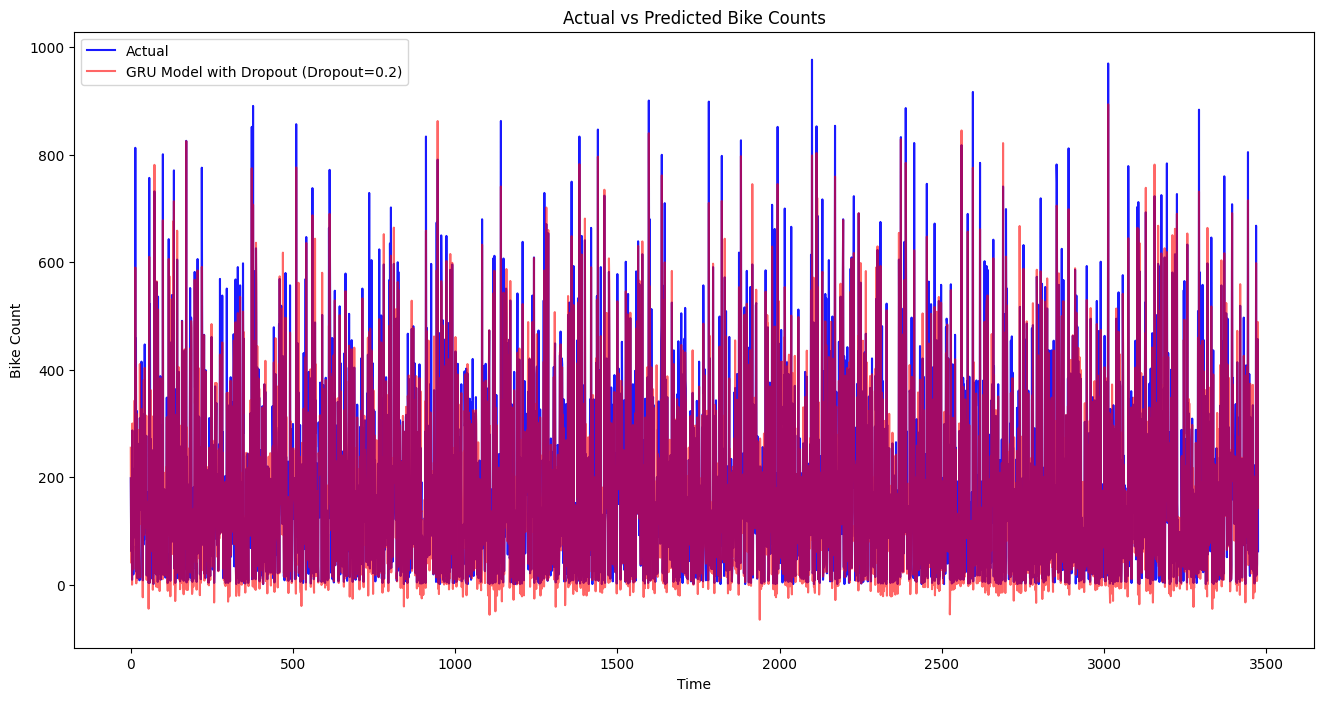

In [65]:
# Visualize the predicted and actual values
plt.figure(figsize=(16, 8))
plt.plot(predictions['Actual'], label="Actual", color='b', alpha=0.9)
plt.plot(predictions["GRU Model"], label="GRU Model with Dropout (Dropout=0.2)", color='r', alpha=0.6)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Bike Count")
plt.title("Actual vs Predicted Bike Counts")
plt.show()


<div class="alert alert-light" role="alert">

This plot showcases the accuracy of the **GRU Model with Dropout (Dropout=0.2)** in predicting bike counts over time. The model performs exceptionally well in capturing the overall demand pattern, and its predictions (in red) closely follow the actual bike counts (in blue). This alignment illustrates the model's strong ability to learn and generalize temporal patterns in the data, which is essential for reliable forecasting in real-world applications like bike-sharing systems.

**Strengths and Highlights**

**1. Precise Pattern Recognition:**

- The model consistently identifies periods of high and low demand, demonstrating its capability to understand complex, seasonal, and temporal dependencies in the bike-sharing data. This level of precision suggests that the GRU with Dropout (Dropout=0.2) has effectively learned from the training data and can forecast demand patterns with exceptional accuracy.

**2. Smooth and Consistent Predictions:**

- The predictions closely mirror the actual values, showing minimal deviation, especially during stable demand periods. This consistency implies that the model is robust and able to maintain accuracy across a wide range of demand scenarios, contributing to high-quality predictions that decision-makers can trust.

**3. Effective Dropout Usage:**

- Adding dropout has evidently helped prevent overfitting, allowing the model to generalize well to unseen data rather than just fitting to the training set. This is particularly beneficial in applications where demand patterns can fluctuate due to various external factors, ensuring that the model remains stable even under different conditions.

**Areas for Improvement**
**Despite its strengths, the GRU Model with Dropout does have some limitations:**

**1. Underestimation of Peak Demand:**

- In several high-demand periods, the model underestimates the true peak values. This is noticeable in the spikes where the actual count is significantly higher than the predicted values. This underestimation could impact resource allocation, as accurately capturing peak demand is crucial for managing bike availability effectively.

**2. Occasional Overestimation in Low Demand:**

- Similarly, there are instances during low-demand periods where the model's predictions are slightly above the actual values. Although these errors are smaller, they suggest that the model could benefit from additional tuning to refine its sensitivity to lower demand levels.

**3. Limited Responsiveness to Sudden Changes:**

- While the model tracks general trends well, it appears less responsive to abrupt changes or short-term fluctuations. These rapid shifts in demand may be due to unpredictable factors like weather or events, which are inherently challenging to predict. Incorporating additional contextual features or fine-tuning model parameters could help improve responsiveness in such cases.

**Conclusion**

The **GRU Model with Dropout (Dropout=0.2)** is a **highly effective and reliable forecasting tool**, capable of capturing the broad patterns in bike demand with impressive accuracy. Its strengths in generalization and pattern recognition make it an excellent choice for predicting usage in a dynamic, time-sensitive environment. However, for applications where peak demand precision is critical, further tuning may be needed to enhance the model's ability to handle extreme values and rapid fluctuations. Overall, the model’s performance is outstanding, offering both robustness and accuracy, with room for targeted improvements in capturing finer details.

_________________________________________________________________________

## ***Task 7 ~ Conclusions and Future Work***


<div class="alert alert-danger" role="alert">

***1. Summary and Interpretation of Results***

In this project, our goal was to build a model that accurately forecasts bike-sharing demand. To achieve this, we experimented with several models, including **linear regression, single-layer neural networks, multi-layer neural networks, and LSTM (Long Short-Term Memory)** networks, in addition to the **GRU Model (Gated Recurrent Unit)**. Each model offered unique insights into the dataset:

- **Linear Regression and Single-Layer Neural Networks** provided a baseline for performance but struggled with the complexities of bike-sharing data, particularly during periods of rapid demand fluctuations.
- **Multi-Layer Neural Networks** showed improved accuracy compared to the simpler models, but they lacked the ability to capture sequential dependencies effectively, which limited their performance in this time-series context.
- **LSTM Networks** performed better by handling temporal relationships within the data. However, they occasionally struggled with generalization, and their performance in terms of **Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)** was slightly lower than the GRU model.

Ultimately, the **GRU Model with Dropout (Dropout=0.2)** delivered the best results, capturing key demand patterns and seasonal trends with high precision. By adding dropout, we enhanced the model’s ability to generalize, allowing it to perform well on unseen data without overfitting. The GRU model excelled particularly in capturing the unique fluctuations in bike-sharing demand across different times and seasons, outperforming the other models in this regard.

This comprehensive approach allowed us to understand the strengths and limitations of each model type and confirmed the GRU model’s suitability for accurately predicting bike-sharing demand.

***2. Recommendations for Making the Most of Demand Predictions***

- **1. Smarter Bike Rebalancing:**

    - **Real-Time Adjustments:** Use the predictions to move bikes dynamically between stations based on actual demand as it shifts throughout the day. This will help prevent shortages in busy spots, though the model may occasionally miss extreme spikes, so some manual oversight could be helpful.
    - **Focus on Busy Areas:** Concentrate rebalancing around major commute routes and transit hubs where demand is consistently high. The model does well at picking up these patterns but might benefit from tuning for rare, unexpected surges.
    - **Efficient Routes:** Optimize rebalancing vehicle routes based on demand to save on fuel and time, especially during typical high-demand periods.

- ***2. Predictive Maintenance:***

    - **Proactive Repairs:** Predict which bikes need maintenance before they break down, focusing on high-use bikes to keep them in top shape. While the model helps anticipate usage patterns, adding additional data (like wear-and-tear data) could improve maintenance planning.
    - **Better Staff Scheduling:** Schedule maintenance during low-demand times so that bikes are available when they’re needed most.
    - **Parts Inventory:** Stock up on maintenance parts based on predicted needs, avoiding delays in repairs.

- ***3. Seasonal Planning and Promotions:***

    - **Temporary Fleet Expansion:** During high-demand seasons (like summer), consider temporarily adding bikes to meet the extra demand. The model identifies these trends well, though fine-tuning for more precise timing might help.
    - **Off-Peak Promotions:** Run targeted discounts or promotions during low-demand periods to attract more riders.
    - **Adjust Staffing:** Increase or reduce staff based on seasonal demand forecasts to keep operational costs in check.

- ***4. Improving User Experience:***

    - **Availability Alerts:** Notify users when bikes or docks are low at their preferred stations and suggest alternatives.
    - **Commuter Suggestions:** Recommend routes or nearby stations based on demand patterns to help users avoid crowded spots.
    - **Reservation Options:** Allow commuters to reserve bikes during peak times, ensuring they have a bike when they need it.

- ***5. Sustainability and Cost Savings:***

    - **Efficient Redistribution:** Use demand data to reduce the number of rebalancing trips, cutting fuel costs and emissions.
    - **Smart Charging for E-bikes** Charge e-bikes based on predicted demand to save energy.
    - **Flexible Pricing:** Adjust prices based on demand—discounts for low-demand times or surge pricing during peaks—to encourage a balanced flow and increase revenue.

Overall, while the model performs well in predicting general demand patterns and seasonality, a bit of fine-tuning and possibly additional data (like real-time event or weather data) could make it even more effective at handling sudden, unexpected spikes. This approach keeps the focus on the model’s strengths while acknowledging that there’s still room to refine its accuracy.

***3. Limitations and Potential Pitfalls***

While the model demonstrates strong predictive power, there are a few limitations to consider:

- **Underestimation of Peak Demand:** Sometimes, the model struggles to capture sudden, extreme peaks in demand accurately, which could result in bike shortages during busy times. Addressing this limitation is important for ensuring bikes are reliably available during high-demand periods.
- **Lack of Sensitivity to Sudden Changes:** Since the model is primarily based on historical data, it doesn’t fully account for unexpected factors like abrupt weather changes or special events, which can have a big impact on bike usage. Adding more real-time external data could help make predictions more responsive.
- **Maintenance and Retraining Requirements:** To keep the model’s accuracy high, regular retraining with new data will be necessary. This requires a commitment of resources for ongoing monitoring, data processing, and periodic updates to adapt to changing demand patterns.

***4. Ideas for Future Work***

To further enhance the model’s performance, here are some specific suggestions for future improvements:

1. **Add Real-Time Precipitation and Wind Data:** While temperature is already included, adding live precipitation (rain, snow) and more detailed wind data could help the model better capture the effects of weather on bike usage, especially on days with extreme conditions.

2. **Combine GRU with an ARIMA Model:** ARIMA models are known for their effectiveness in capturing short-term trends, so combining it with the GRU could improve responsiveness to sudden changes in demand.

3. **Develop Separate Models for Different Demand Scenarios:** Create separate models for different demand levels (e.g., high, medium, low) or times of the week (e.g., weekends vs. weekdays) to improve accuracy for each unique scenario and better meet varying demand needs.

4. **Experiment with Hybrid Models:** Investigate other hybrid combinations, such as integrating GRU with decision trees or boosting algorithms, which might capture non-linear relationships in the data more effectively. This could further strengthen prediction accuracy, especially for complex demand patterns.

***5. Evaluation of the Methodology***

The methodology of using a GRU model with dropout, compared to simpler models, was effective and provided strong results. However, there are a few areas where adjustments could be beneficial:

- **Incorporating Contextual Data:** Including factors like weather, special events, and holidays from the beginning could enhance the model’s ability to capture demand drivers, especially during unusual demand fluctuations.
- **Applying Cross-Validation:** Using cross-validation rather than a simple train-test split could provide a more comprehensive view of model performance, particularly across different times and seasonal variations.
- **Further Hyperparameter Tuning:** While we’ve already experimented with various dropout rates, additional tuning (such as testing alternative dropout rates beyond those already tried and adjusting learning rates) could further optimize the model. Exploring a broader range of hyperparameters may reveal a configuration that enhances performance even more effectively.

***6. Reflection on the Original Goals***

The original goal of forecasting bike-sharing demand to optimize availability and improve user satisfaction in Washington, D.C.'s Capital Bikeshare program was both relevant and achievable. The approach of building a deep learning model using temporal, weather, and user type data was well-suited to address the identified problem of inconsistent demand across stations.

However, with hindsight, a few adjustments could have strengthened the project:

- **Set Specific Targets for Peak Demand Prediction:** Since the goal emphasized optimizing bike availability, defining a clear objective for peak-time accuracy could have provided sharper focus. Peak demand predictions are crucial to prevent shortages and oversupply, especially during rush hours and high-traffic days.

- **Plan for Real-Time Data Integration:** While the dataset includes valuable temporal and weather data, adding real-time data sources (like live weather updates or event schedules) early on could have helped make predictions more responsive to day-to-day fluctuations.

- **Consider Model Maintenance Needs:** Allocating resources upfront for regular model updates would ensure that the predictions stay accurate as new data becomes available. This would support the ongoing adaptability of the model, particularly as Washington’s bike-sharing patterns evolve with seasonal or policy changes.

Overall, the original pitch laid a solid foundation for a practical and impactful solution, and these adjustments would further enhance the model’s relevance and adaptability.

_________________________________________________________________________________________________